<a href="https://colab.research.google.com/github/demelere/CNNs-for-Computer-Vision/blob/master/458_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Setup and Import

In [22]:
# Import dependencies
import numpy as np
import pandas as pd
import os
from collections import Counter
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
# check Keras version
keras.__version__

# check tensorflow version
tf.__version__

# set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
# Saving in Colab
# os.getcwd()
# %cd /content/gdrive/My\ Drive/MSDS458/weekfive
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "content/gdrive/My Drive/MSDS458/weekfive"
# chp_id = "ann"

## A.1 Import data

In [26]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [27]:
# training labels are integers btw/0 and 9, and correspond to different articles of clothing
Counter(train_labels).most_common()

[(9, 6000),
 (0, 6000),
 (3, 6000),
 (2, 6000),
 (7, 6000),
 (5, 6000),
 (1, 6000),
 (6, 6000),
 (4, 6000),
 (8, 6000)]

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

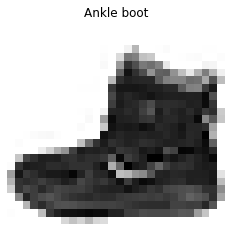

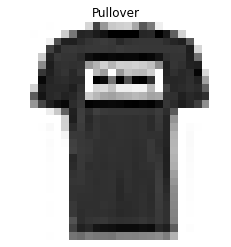

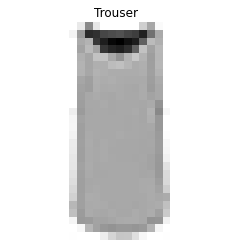

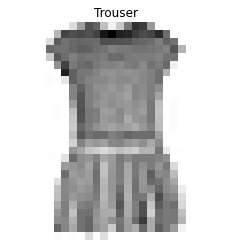

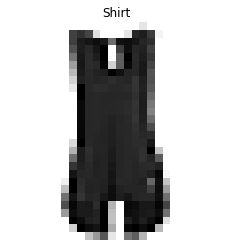

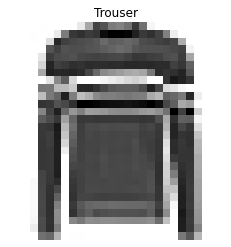

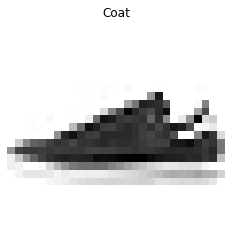

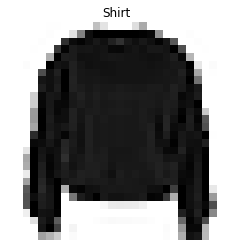

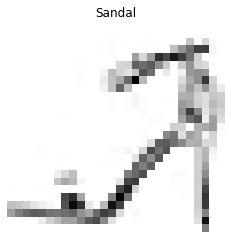

In [29]:
for i in range (9):
  plt.imshow(train_images[i], cmap="binary") 
  plt.axis('off')
  plt.title(class_names[test_labels[i]], fontsize=12)
  plt.show()

## A.2 Data Cleaning and Transformation

In [30]:
# Reshape the data into the right format for model (float32 array w/shape 60000, 28*28 and values btw/ 0 and 1).
#train_images = train_images.reshape((60000, 28 * 28))  # Decided instead to use a Flatten layer in the model
train_images = train_images.astype('float32') / 255

#test_images = test_images.reshape((10000, 28 * 28))  # Decided instead to use a Flatten layer in the model
test_images = test_images.astype('float32') / 255

In [31]:
# Hold back 5,000 of the 60,000 training images for validation.
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [32]:
# function to help calculate training and test evaluation times
class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [33]:
class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

# 1. Experiment 1: Baseline DNN w/2 layers

This model will have 784 input nodes.  It will take two dense (fully-connected) layers.  The first (hidden) layer will have 5 nodes, and the second (softmax) layer will have 10 output nodes.

In [34]:
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=[28, 28]))
model_1.add(layers.Dense(5, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax')) 

In [35]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


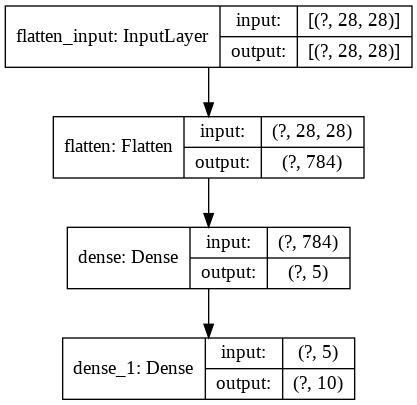

In [36]:
keras.utils.plot_model(model_1, show_shapes=True)

## 1A. Model Compilation

This step includes an optimizer (how the network updates itself based on the data and the loss function), a loss function (how the network measures how good a job it is doing on the data and adjusts), and metrics (accuracy).

In [37]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 1B. Model Training

Train model for 20 epochs with batch size 100

In [38]:
train_rt = TrainRuntimeCallback()
history = model_1.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 1s 22us/sample - loss: 1.0889 - accuracy: 0.6191 - val_loss: 0.6809 - val_accuracy: 0.7758
Epoch 2/20
55000/55000 [==============================] - 1s 22us/sample - loss: 0.6265 - accuracy: 0.7911 - val_loss: 0.5808 - val_accuracy: 0.8058
Epoch 3/20
55000/55000 [==============================] - 1s 21us/sample - loss: 0.5576 - accuracy: 0.8116 - val_loss: 0.5353 - val_accuracy: 0.8230
Epoch 4/20
55000/55000 [==============================] - 1s 22us/sample - loss: 0.5256 - accuracy: 0.8202 - val_loss: 0.5090 - val_accuracy: 0.8330
Epoch 5/20
55000/55000 [==============================] - 1s 22us/sample - loss: 0.5063 - accuracy: 0.8257 - val_loss: 0.4962 - val_accuracy: 0.8364
Epoch 6/20
55000/55000 [==============================] - 1s 22us/sample - loss: 0.4931 - accuracy: 0.8307 - val_loss: 0.4912 - val_accuracy: 0.8394
Epoch 7/20
55000/55000 [==============================] -

In [39]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.623617

In [40]:
model_1.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 5) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32>]

## 1C. Model Testing

Test the model on the test dataset.

In [41]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1.evaluate(test_images, test_labels, callbacks=[test_rt])

In [42]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.448479

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
history_df=pd.DataFrame(history_dict)
# history_df.tail()

In [45]:
# Create a results DataFrame using the last row of history_df
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','DNN (2 layers)') # went the model name to appear first
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.439656,0.846909,0.453395,0.8478,25.623617,0.448479


In [46]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 1D. Performance

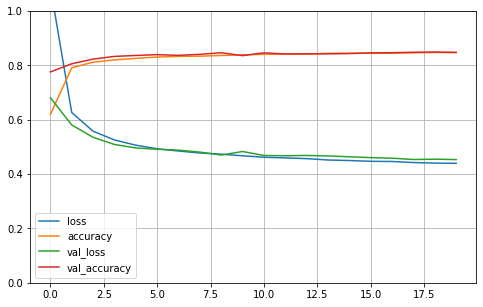

In [47]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 2. Experiment 2: DNN w/3 layers

This model will have 784 input nodes.  It will take three dense (fully-connected) layers.  The first (hidden) layer will have 10 nodes, a second hidden layer with 10 nodes, and a third (softmax) layer will have 10 output nodes.

In [48]:
# Instead of adding the layers one by one, we can pass a list of layers when creating the Sequential mode.
model_2 = models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


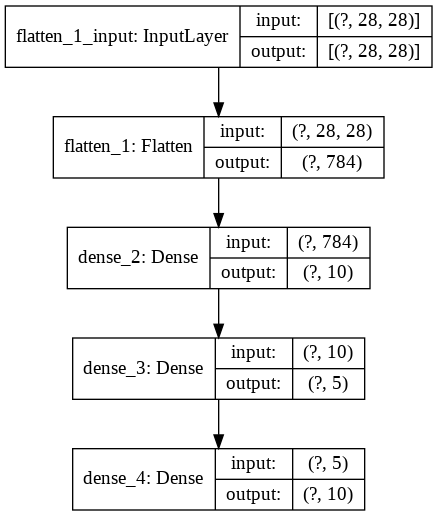

In [50]:
keras.utils.plot_model(model_2, show_shapes=True)

## 2A. Model Compilation

In [51]:
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 2B. Model Training


In [52]:
train_rt = TrainRuntimeCallback()
history = model_2.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 1s 24us/sample - loss: 1.6777 - accuracy: 0.3598 - val_loss: 1.1952 - val_accuracy: 0.5924
Epoch 2/20
55000/55000 [==============================] - 1s 23us/sample - loss: 1.0749 - accuracy: 0.6034 - val_loss: 0.9782 - val_accuracy: 0.6218
Epoch 3/20
55000/55000 [==============================] - 1s 23us/sample - loss: 0.9417 - accuracy: 0.6256 - val_loss: 0.8973 - val_accuracy: 0.6344
Epoch 4/20
55000/55000 [==============================] - 1s 23us/sample - loss: 0.8778 - accuracy: 0.6374 - val_loss: 0.8483 - val_accuracy: 0.6428
Epoch 5/20
55000/55000 [==============================] - 1s 23us/sample - loss: 0.8383 - accuracy: 0.6497 - val_loss: 0.8176 - val_accuracy: 0.6556
Epoch 6/20
55000/55000 [==============================] - 1s 22us/sample - loss: 0.8099 - accuracy: 0.6650 - val_loss: 0.8050 - val_accuracy: 0.6790
Epoch 7/20
55000/55000 [==============================] -

In [53]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.14517

In [54]:
model_2.layers[1].weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32>]

## 2C. Model Compilation

In [55]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2.evaluate(test_images, test_labels, callbacks=[test_rt])

In [56]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.464393

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.556792,0.816255,0.560668,0.8126
16,0.547216,0.817764,0.553264,0.8140
17,0.542345,0.818364,0.546857,0.8138
18,0.535874,0.820236,0.552245,0.8116
19,0.528516,0.821709,0.544680,0.8134


In [59]:
history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df2 = history_df.iloc[-1:].copy()
results_df2.insert(0,'model','DNN (3 layers)') # went the model name to appear first
results_df2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers),0.528516,0.821709,0.54468,0.8134,25.14517,0.464393


In [60]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 2D. Performance

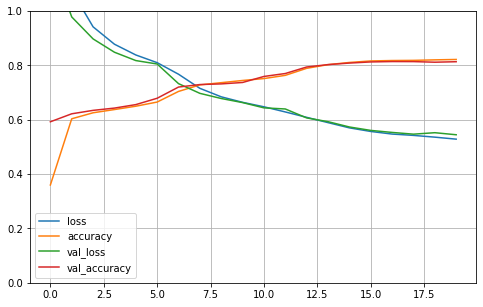

In [61]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 3. Experiment 3: CNN w/2 layers

This model will have 2 layers, each consisting of a convolution layer and a max pooling layer.  The second layer will return an array of 10 probability scores.

In [62]:
# Data re-import and preparation
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [63]:
# Reshape images and scale
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [64]:
# Validation images
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [65]:
model_3a = models.Sequential()
model_3a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Flatten())
model_3a.add(layers.Dense(128, activation='relu'))
model_3a.add(layers.Dense(10, activation='softmax'))

In [66]:
model_3a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

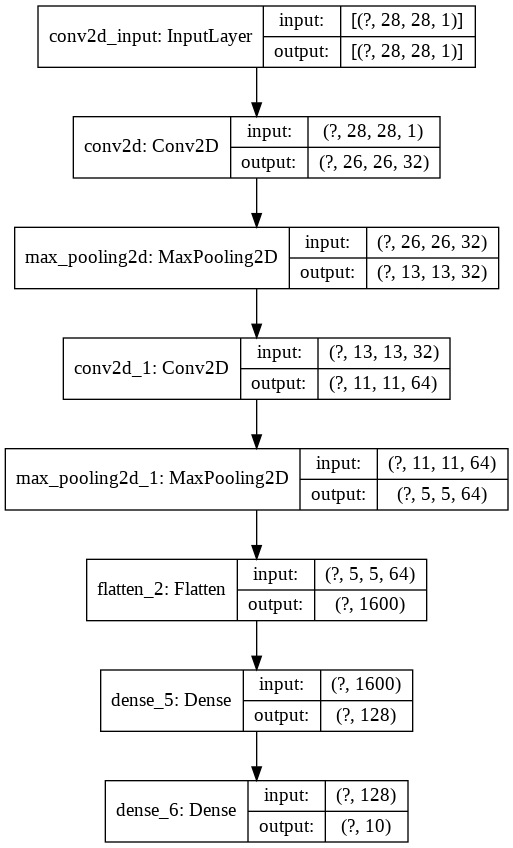

In [67]:
keras.utils.plot_model(model_3a, show_shapes=True)

## 3A. Model Compilation

In [68]:
model_3a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 3B. Model Training

In [69]:
train_rt = TrainRuntimeCallback()
history = model_3a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 39us/sample - loss: 0.5262 - accuracy: 0.8116 - val_loss: 0.3593 - val_accuracy: 0.8746
Epoch 2/20
55000/55000 [==============================] - 2s 37us/sample - loss: 0.3412 - accuracy: 0.8766 - val_loss: 0.3051 - val_accuracy: 0.8918
Epoch 3/20
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2933 - accuracy: 0.8931 - val_loss: 0.2786 - val_accuracy: 0.9026
Epoch 4/20
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2634 - accuracy: 0.9035 - val_loss: 0.2578 - val_accuracy: 0.9076
Epoch 5/20
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2391 - accuracy: 0.9124 - val_loss: 0.2829 - val_accuracy: 0.8998
Epoch 6/20
55000/55000 [==============================] - 2s 38us/sample - loss: 0.2191 - accuracy: 0.9191 - val_loss: 0.2525 - val_accuracy: 0.9094
Epoch 7/20
55000/55000 [==============================] -

In [70]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

46.637185

## 3C. Model Testing

Evaluate the model on the test dataset using a callback to get the total test time.

In [71]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3a.evaluate(test_images, test_labels, callbacks=[test_rt])

In [72]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.587652

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [74]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.086847,0.968436,0.260744,0.9208
16,0.078712,0.970418,0.277085,0.9210
17,0.069431,0.974964,0.290287,0.9188
18,0.060553,0.978473,0.282228,0.9232
19,0.057423,0.978873,0.293414,0.9198


In [75]:
# Pull statistics 
results_df3a = history_df.iloc[-1:].copy()
results_df3a.insert(0,'model','CNN (2 layers)') # want the model name to appear first
results_df3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers),0.057423,0.978873,0.293414,0.9198,46.637185,0.587652


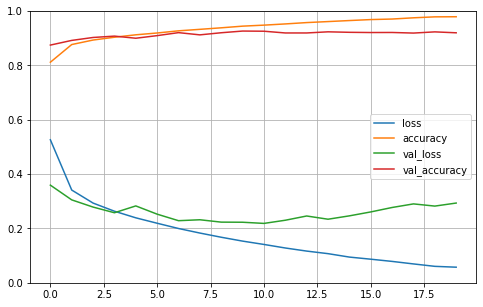

In [76]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 3D. Intermediate Activations

In [77]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers
# from tensorflow.keras import regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# # Use model 3b
# # model = load_model('results/fashion_mnist_model_3b.h5')
# # model.summary()  # As a reminder.
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [78]:
# # import matplotlib.pyplot as plt
# # import tensorflow as tf
# tf.compat.v1.disable_eager_execution() # ADDED FOR EXPERIMENTAL PART
# # from tensorflow import keras
# # keras.__version__

In [79]:
# # https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
# from tensorflow.keras.datasets import fashion_mnist

# (_,_), (test_images, test_labels) = fashion_mnist.load_data()

In [80]:
# # an ankle boot is used as the input image
# from tensorflow.keras.preprocessing import image
# import numpy as np

# img = test_images[0]
# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)

In [81]:
# # https://www.tensorflow.org/tutorials/keras/classification
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [82]:
# # Extracts the outputs of the all the layers
# layer_outputs = [layer.output for layer in model.layers]
# # Creates a model that will return these outputs, given the model input:
# activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [83]:
# # Examine layer names
# layer_names = []
# for layer in model.layers[:7]:
#     layer_names.append(layer.name)
    
# layer_names

In [84]:
# # When fed the image input, this model returns the values of the layer activations in the original model. 
# # The model has 1 input and 7 outputs, one output per layer activation. 
# activations = activation_model.predict(img_tensor)
# len(activations)

In [85]:
# # For instance, this is the activation of the first convolution layer for our ankle boot image input
# first_layer_activation = activations[0]
# first_layer_activation.shape

In [86]:
# # It's a 148x148 feature map with 32 channels. Let's try visualizing the 3rd channel: 
# third_channel = first_layer_activation[0,:, :,3]
# third_channel.shape

In [87]:
# # Activations for all the channels in the first max pooling layer. 
# images_per_row = 16

# layer_name, layer_activation = layer_names[1], activations[1]
    
# # This is the number of features in the feature map
# n_features = layer_activation.shape[-1]

# # The feature map has shape (1, size, size, n_features)
# size = layer_activation.shape[1]

# print(f"The feature map has shape (1, {size}, {size}, {n_features})")

# # We will tile the activation channels in this matrix
# n_cols = n_features // images_per_row
# display_grid = np.zeros((size * n_cols, images_per_row * size))

# # We'll tile each filter into this big horizontal grid
# for col in range(n_cols):
#     for row in range(images_per_row):
#         channel_image = layer_activation[0,
#                                          :, :,
#                                          col * images_per_row + row]
#         # Post-process the feature to make it visually palatable
#         channel_image -= channel_image.mean()
#         channel_image /= channel_image.std()
#         channel_image *= 64
#         channel_image += 128
#         channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#         display_grid[col * size : (col + 1) * size,
#                      row * size : (row + 1) * size] = channel_image

# # Display the grid
# scale = 1. / size
# plt.figure(figsize=(scale * display_grid.shape[1],
#                     scale * display_grid.shape[0]))
# plt.title(layer_name)
# plt.grid(False)
# plt.imshow(display_grid, aspect='auto', cmap='binary')

# plt.show()

# 4. Experiment 4: CNN w/3 layers

## Model 4a: baseline CNN with 3 layers (no L2 regularization)

In [88]:
model_4a = models.Sequential()
model_4a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.Flatten())
model_4a.add(layers.Dense(64, activation='relu'))
model_4a.add(layers.Dense(10, activation='softmax'))

In [89]:
model_4a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

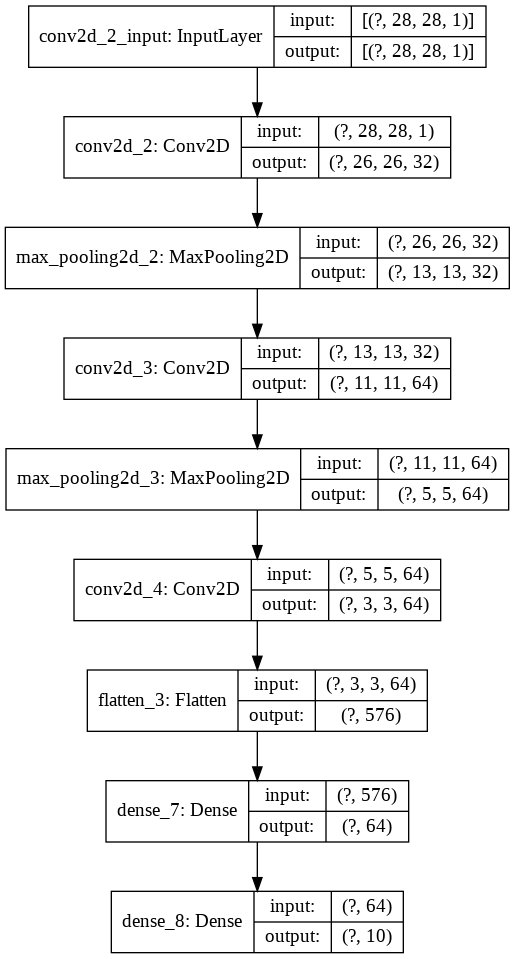

In [90]:
keras.utils.plot_model(model_4a, show_shapes=True)

## 4A. Model Compilation

In [91]:
model_4a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 4B. Model Compilation

In [92]:
train_rt = TrainRuntimeCallback()
history = model_4a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 43us/sample - loss: 0.6201 - accuracy: 0.7752 - val_loss: 0.4105 - val_accuracy: 0.8566
Epoch 2/20
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3800 - accuracy: 0.8629 - val_loss: 0.3543 - val_accuracy: 0.8764
Epoch 3/20
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3190 - accuracy: 0.8846 - val_loss: 0.3068 - val_accuracy: 0.8932
Epoch 4/20
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2893 - accuracy: 0.8935 - val_loss: 0.2999 - val_accuracy: 0.8942
Epoch 5/20
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2648 - accuracy: 0.9044 - val_loss: 0.2879 - val_accuracy: 0.8942
Epoch 6/20
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2444 - accuracy: 0.9122 - val_loss: 0.2623 - val_accuracy: 0.9042
Epoch 7/20
55000/55000 [==============================] -

In [93]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

44.702734

## 4C. Model Testing

In [94]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4a.evaluate(test_images, test_labels, callbacks=[test_rt])

In [95]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.566357

In [96]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [97]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.119815,0.955891,0.270317,0.9154
16,0.111189,0.958600,0.279117,0.9158
17,0.104301,0.960418,0.285327,0.9170
18,0.100560,0.962745,0.309135,0.9142
19,0.090918,0.965909,0.303845,0.9144


In [98]:
# Pull statistics 
# Pull statistics 
results_df4a = history_df.iloc[-1:].copy()
results_df4a.insert(0,'model','CNN (3 layers)') # want the model name to appear first
results_df4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers),0.090918,0.965909,0.303845,0.9144,44.702734,0.566357


In [99]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

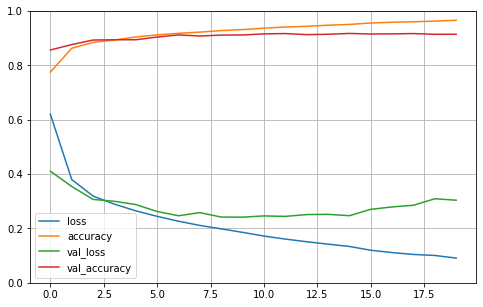

In [100]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 5. Experiment 5: Add Dropout to All Models

In [101]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [102]:
# We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))  
test_images = test_images.astype('float32') / 255

# Create validation data
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

## 5A. Model 1

In [103]:
model_1do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_1do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_1do.add(layers.Dropout(0.2))
model_1do.add(layers.Dense(10, activation='softmax')) 

model_1do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1do.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [104]:
train_rt = TrainRuntimeCallback()
history = model_1do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100, validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1do.h5'
# model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 30us/sample - loss: 1.5454 - accuracy: 0.4225 - val_loss: 1.0409 - val_accuracy: 0.6776
Epoch 2/20
55000/55000 [==============================] - 2s 29us/sample - loss: 1.1778 - accuracy: 0.5659 - val_loss: 0.8091 - val_accuracy: 0.7468
Epoch 3/20
55000/55000 [==============================] - 2s 29us/sample - loss: 1.0413 - accuracy: 0.6116 - val_loss: 0.7341 - val_accuracy: 0.7782
Epoch 4/20
55000/55000 [==============================] - 2s 29us/sample - loss: 0.9985 - accuracy: 0.6303 - val_loss: 0.6966 - val_accuracy: 0.7896
Epoch 5/20
55000/55000 [==============================] - 2s 28us/sample - loss: 0.9607 - accuracy: 0.6459 - val_loss: 0.6460 - val_accuracy: 0.8144
Epoch 6/20
55000/55000 [==============================] - 2s 29us/sample - loss: 0.9414 - accuracy: 0.6541 - val_loss: 0.6356 - val_accuracy: 0.8152
Epoch 7/20
55000/55000 [==============================] -

In [105]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

32.724154

In [106]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1do.evaluate(test_images, test_labels, callbacks=[test_rt])

In [107]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.508009

In [108]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Create a results DataFrame using the last row of history_df
results_df_do = history_df.iloc[-1:].copy()
results_df_do.insert(0,'model','DNN (2 layers DO)') # went the model name to appear first
results_df_do['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers DO),0.868838,0.691327,0.587843,0.8232,32.724154,0.508009


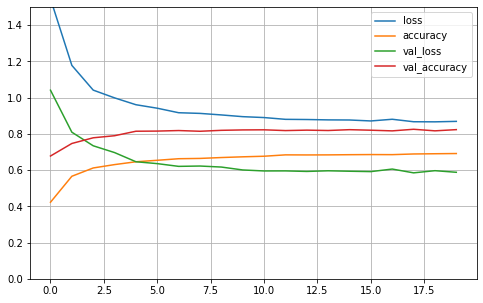

In [109]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5B. Model 2

In [110]:
model_2do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_2do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='relu'))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='softmax')) 

model_2do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2do.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 4,095
Trainable params: 4,095
Non-trainable params: 0
_________________________________________________________________


In [111]:
train_rt = TrainRuntimeCallback()
history = model_2do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2do.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 38us/sample - loss: 1.6658 - accuracy: 0.3699 - val_loss: 0.9806 - val_accuracy: 0.6738
Epoch 2/20
55000/55000 [==============================] - 2s 34us/sample - loss: 1.2224 - accuracy: 0.5197 - val_loss: 0.8423 - val_accuracy: 0.7282
Epoch 3/20
55000/55000 [==============================] - 2s 34us/sample - loss: 1.1327 - accuracy: 0.5509 - val_loss: 0.7830 - val_accuracy: 0.7392
Epoch 4/20
55000/55000 [==============================] - 2s 35us/sample - loss: 1.1065 - accuracy: 0.5629 - val_loss: 0.7699 - val_accuracy: 0.7434
Epoch 5/20
55000/55000 [==============================] - 2s 35us/sample - loss: 1.0777 - accuracy: 0.5825 - val_loss: 0.7445 - val_accuracy: 0.7556
Epoch 6/20
55000/55000 [==============================] - 2s 35us/sample - loss: 1.0649 - accuracy: 0.5901 - val_loss: 0.7270 - val_accuracy: 0.7588
Epoch 7/20
55000/55000 [==============================] -

In [112]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

38.402772

In [113]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2do.evaluate(test_images, test_labels, callbacks=[test_rt])

In [114]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.492156

In [115]:
history_dict = history.history
history_dict.keys()

istory_df=pd.DataFrame(history_dict)
history_df.tail()

history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df_do_2 = history_df.iloc[-1:].copy()
results_df_do_2.insert(0,'model','DNN (3 layers DO)') # went the model name to appear first
results_df_do_2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers DO),0.979208,0.628291,0.673944,0.7566,38.402772,0.492156


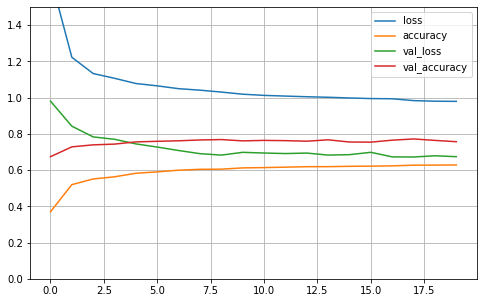

In [116]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5C. Model 3

In [117]:
# We transform it into a float32 array of shape (60000, 28, 28, 1) with values between 0 and 1. 
train_images = train_images.reshape((55000, 28, 28, 1))
val_images =val_images.reshape((5000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [118]:
model_3ado = models.Sequential()
model_3ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Flatten())
model_3ado.add(layers.Dense(128, activation='relu'))
model_3ado.add(layers.Dense(10, activation='softmax'))

model_3ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3ado.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

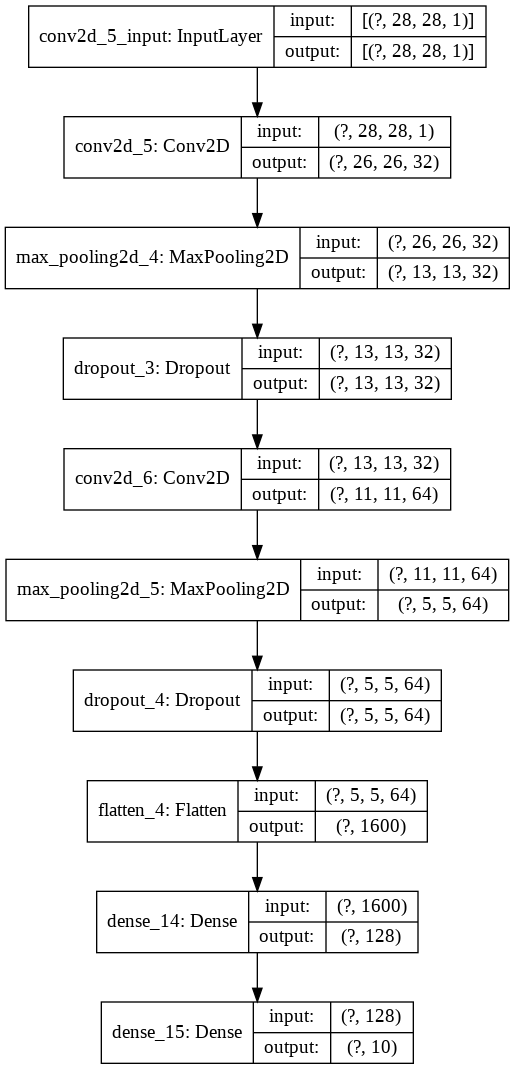

In [119]:
keras.utils.plot_model(model_3ado, show_shapes=True)

In [120]:
train_rt = TrainRuntimeCallback()
history = model_3ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5937 - accuracy: 0.7824 - val_loss: 0.4040 - val_accuracy: 0.8616
Epoch 2/20
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3993 - accuracy: 0.8555 - val_loss: 0.3379 - val_accuracy: 0.8818
Epoch 3/20
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3463 - accuracy: 0.8741 - val_loss: 0.3116 - val_accuracy: 0.8866
Epoch 4/20
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3147 - accuracy: 0.8867 - val_loss: 0.3009 - val_accuracy: 0.8906
Epoch 5/20
55000/55000 [==============================] - 3s 57us/sample - loss: 0.2920 - accuracy: 0.8932 - val_loss: 0.2630 - val_accuracy: 0.9066
Epoch 6/20
55000/55000 [==============================] - 3s 56us/sample - loss: 0.2740 - accuracy: 0.8989 - val_loss: 0.2470 - val_accuracy: 0.9116
Epoch 7/20
55000/55000 [==============================] -

In [121]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

62.399543

In [122]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3ado.evaluate(test_images, test_labels, callbacks=[test_rt])

In [123]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.581591

In [124]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
results_df_do_3a = history_df.iloc[-1:].copy()
results_df_do_3a.insert(0,'model','CNN (2 layers DO)') # want the model name to appear first
results_df_do_3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers DO),0.149728,0.942927,0.210911,0.9238,62.399543,0.581591


In [125]:
# # Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = prev_results_df.append(results_df,ignore_index=True)
# results_df

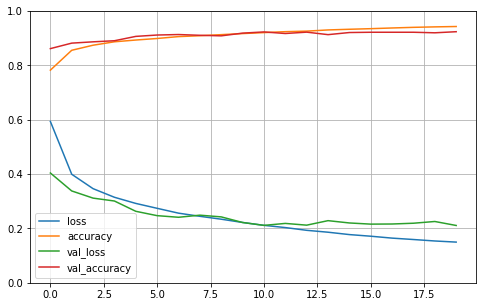

In [126]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 5D. Model 4

In [127]:
model_4ado = models.Sequential()
model_4ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Flatten())
model_4ado.add(layers.Dense(64, activation='relu'))
model_4ado.add(layers.Dense(10, activation='softmax'))

model_4ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4ado.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)         

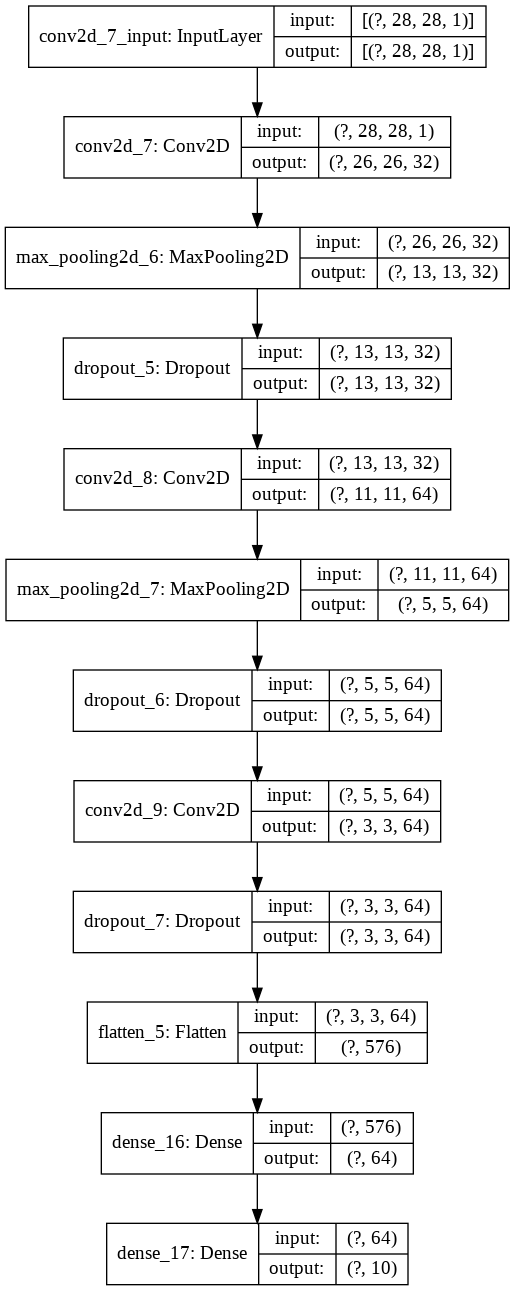

In [128]:
keras.utils.plot_model(model_4ado, show_shapes=True)

In [129]:
train_rt = TrainRuntimeCallback()
history = model_4ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 68us/sample - loss: 0.6903 - accuracy: 0.7400 - val_loss: 0.4231 - val_accuracy: 0.8492
Epoch 2/20
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4404 - accuracy: 0.8388 - val_loss: 0.3556 - val_accuracy: 0.8752
Epoch 3/20
55000/55000 [==============================] - 3s 63us/sample - loss: 0.3807 - accuracy: 0.8602 - val_loss: 0.3266 - val_accuracy: 0.8744
Epoch 4/20
55000/55000 [==============================] - 3s 64us/sample - loss: 0.3464 - accuracy: 0.8733 - val_loss: 0.2901 - val_accuracy: 0.8948
Epoch 5/20
55000/55000 [==============================] - 3s 63us/sample - loss: 0.3221 - accuracy: 0.8823 - val_loss: 0.2843 - val_accuracy: 0.8944
Epoch 6/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3027 - accuracy: 0.8890 - val_loss: 0.2709 - val_accuracy: 0.8986
Epoch 7/20
55000/55000 [==============================] -

In [130]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

69.335093

In [131]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4ado.evaluate(test_images, test_labels, callbacks=[test_rt])

In [132]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.598993

In [133]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
# Pull statistics 
results_df_do_4a = history_df.iloc[-1:].copy()
results_df_do_4a.insert(0,'model','CNN (3 layers DO)') # want the model name to appear first
results_df_do_4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers DO),0.21071,0.920309,0.218927,0.9198,69.335093,0.598993


In [134]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

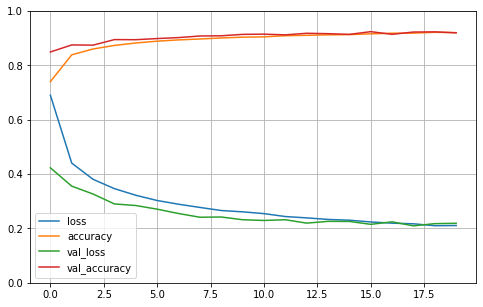

In [135]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 6. Final Results

In [136]:
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.439656,0.846909,0.453395,0.8478,25.623617,0.448479


In [138]:
# # Add the new data to results_df:

results_df=results_df.append(results_df2,ignore_index=True)
results_df=results_df.append(results_df3a,ignore_index=True)
results_df=results_df.append(results_df4a,ignore_index=True)
results_df=results_df.append(results_df_do,ignore_index=True)
results_df=results_df.append(results_df_do_2,ignore_index=True)
results_df=results_df.append(results_df_do_3a,ignore_index=True)
results_df=results_df.append(results_df_do_4a,ignore_index=True)

results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
0,DNN (2 layers),0.439656,0.846909,0.453395,0.8478,25.623617,0.448479
1,DNN (3 layers),0.528516,0.821709,0.544680,0.8134,25.145170,0.464393
2,CNN (2 layers),0.057423,0.978873,0.293414,0.9198,46.637185,0.587652
3,CNN (3 layers),0.090918,0.965909,0.303845,0.9144,44.702734,0.566357
4,DNN (2 layers DO),0.868838,0.691327,0.587843,0.8232,32.724154,0.508009
5,DNN (3 layers DO),0.979208,0.628291,0.673944,0.7566,38.402772,0.492156
6,CNN (2 layers DO),0.149728,0.942927,0.210911,0.9238,62.399543,0.581591
7,CNN (3 layers DO),0.210710,0.920309,0.218927,0.9198,69.335093,0.598993
